<a href="https://colab.research.google.com/github/EZZY619/EZZY619/blob/main/Retail_analysis_insight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ABSTRACT**

This dataset contains 1,000 rows of **synthetic online retail sales data**, mimicking transactions from an e-commerce platform. It includes information on **customer demographics**, **product details**, **purchase history**, and optionally, **product reviews**.

The dataset is well-suited for various **data analysis**, **data visualization**, and **machine learning** tasks, including but not limited to:

- Customer segmentation  
- Product recommendation  
- Sales forecasting  
- Market basket analysis  
- Trend exploration within the e-commerce space  

The data was generated using the **Python Faker** library to ensure realistic distributions while maintaining full privacy—**no real customer information is included**.

🔗 [Click here to access the dataset on Kaggle](https://www.kaggle.com/datasets/ertugrulesol/online-retail-data)

---

## **📌 Project Goal**

Throughout this project, I will extract and present **actionable insights** from the dataset to help **business owners, entrepreneurs, and investors** make **data-driven decisions** on what to **invest in** or **buy** in the e-commerce sector.

---

## **📦 Package Importation**

Below are the Python packages used throughout this analysis:

1. **Pandas** – for data manipulation and preprocessing  
2. **Matplotlib** – for basic visualizations  
3. **WordCloud** – to visualize the most frequent words in product reviews or descriptions  
4. **Seaborn** – for enhanced and professional visualizations  

After importing these packages, we’ll also configure the aesthetic style for consistent and visually appealing plots.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load and prepare data
df = pd.read_csv("synthetic_online_retail_data.csv")
df['order_date'] = pd.to_datetime(df['order_date'])
df['revenue'] = df['price'] * df['quantity']

# Set aesthetic style
sns.set(style="whitegrid", palette="Set2", font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 6)

## 📊 Visualizing Product Name Frequency with a Word Cloud

To understand which products are most frequently purchased or mentioned in our dataset, we’ll create a **Word Cloud**. This visualization technique helps us quickly identify popular items by displaying the most frequent words in larger, more prominent font sizes.

The Word Cloud will be generated using the product names from the dataset. This can give business owners and stakeholders a quick overview of which products are commonly ordered, potentially pointing toward best-sellers or trending items.

Let’s generate the Word Cloud below:

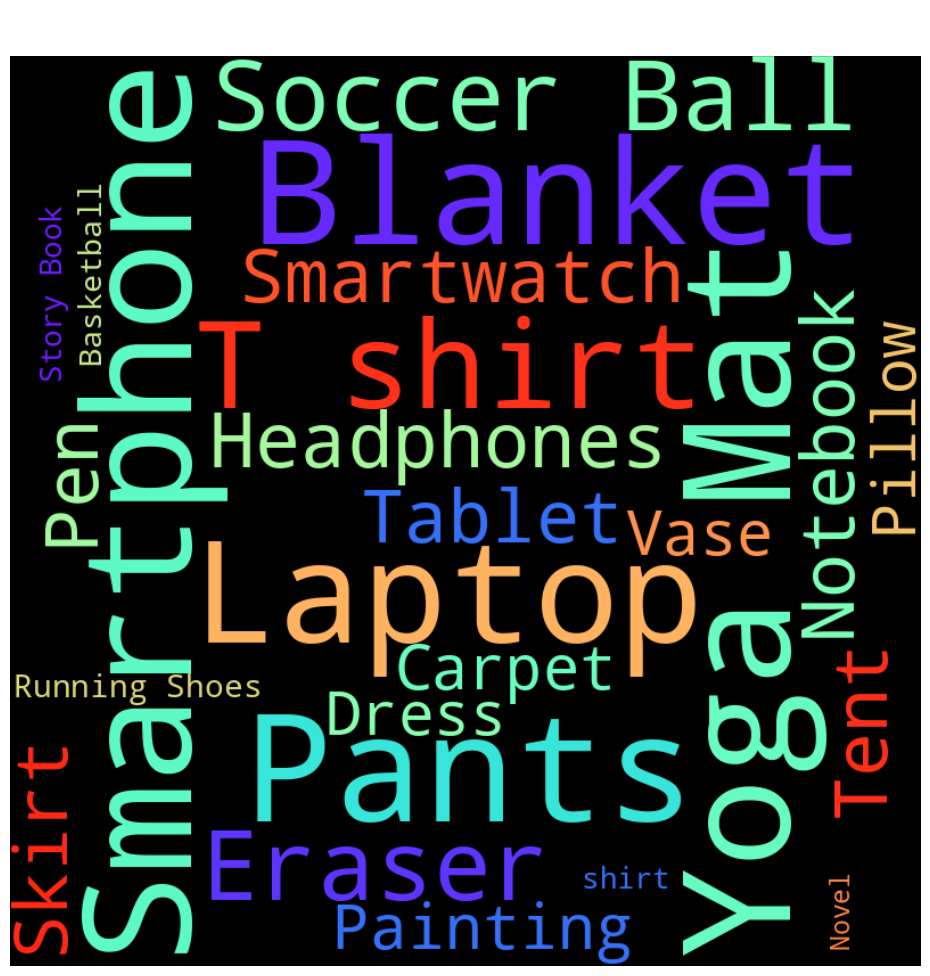

In [ ]:


# Combine product names into a single string
text = " ".join(df["product_name"].astype(str).tolist())

# Create the WordCloud with aesthetic styling
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="black",
    colormap="rainbow",        # Color scheme similar to the example
    prefer_horizontal=0.6,     # Mix horizontal and vertical orientation
    max_words=200,             # Limit for focus
    min_font_size=10,
    contour_width=0,
    relative_scaling=0.5,
    normalize_plurals=True
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Product Names", fontsize=18, color='white', pad=20)
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     721 non-null    int64  
 1   order_date      721 non-null    object 
 2   product_id      721 non-null    int64  
 3   category_id     721 non-null    int64  
 4   category_name   721 non-null    object 
 5   product_name    721 non-null    object 
 6   quantity        721 non-null    int64  
 7   price           721 non-null    float64
 8   payment_method  721 non-null    object 
 9   city            721 non-null    object 
 10  review_score    721 non-null    int64  
 11  gender          721 non-null    object 
 12  age             721 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 73.4+ KB


## 💰 Q1: Revenue by Product Category

In this section, we'll analyze which **product categories** generate the most revenue.

Understanding category-level revenue helps businesses and investors:
- Identify high-performing areas worth doubling down on.
- Spot underperforming categories that may require marketing, redesign, or removal.
- Guide inventory decisions and marketing focus.

We will:
- Group the dataset by `category_name`.
- Sum up the `price` column to calculate total revenue per category.
- Visualize the result using a horizontal bar plot for easy comparison.

Let's dive into the code and see which categories are bringing in the most money:

<ipython-input-9-9c5ce404b94f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_rev.values, y=cat_rev.index, palette="viridis")


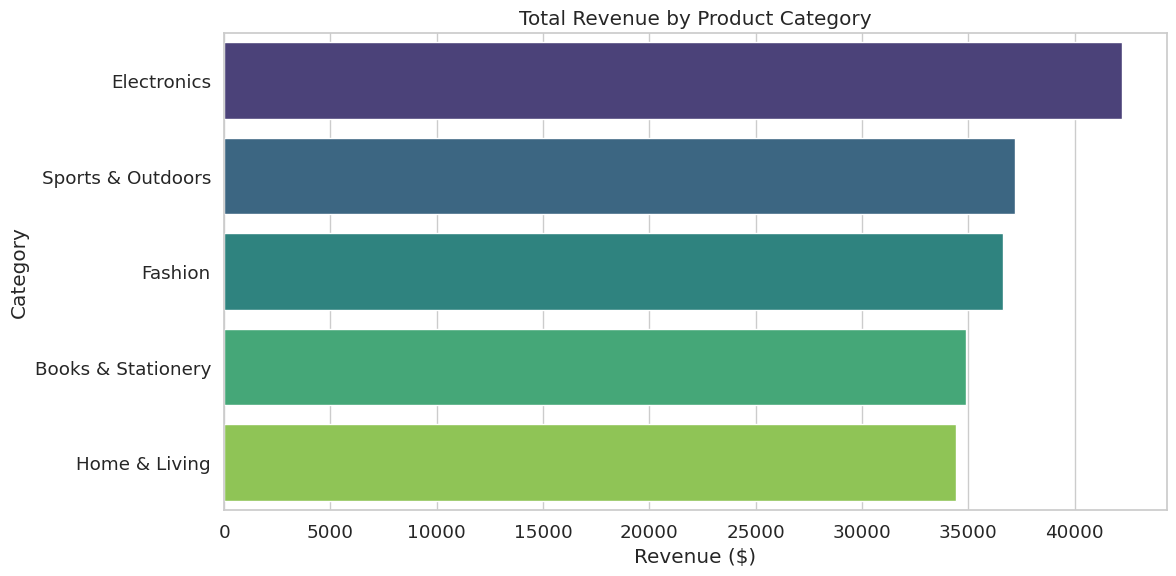

In [ ]:
# -------------------------------
# Q1: Revenue by Product Category
# -------------------------------
cat_rev = df.groupby("category_name")["price"].sum().sort_values(ascending=False)
sns.barplot(x=cat_rev.values, y=cat_rev.index, palette="viridis")
plt.title("Total Revenue by Product Category")
plt.xlabel("Revenue ($)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

## 🏆 Q2: Top 10 Best-Selling Products

To uncover which individual products are the most popular among customers, we'll analyze **sales volume** by product name.

This analysis answers:
- Which products are being purchased the most?
- What items drive the most transactions by quantity?

By identifying the **top 10 best-selling products**, businesses can:
- Prioritize stock and inventory for high-demand items
- Promote best-sellers through marketing campaigns
- Investigate customer preferences and buying behavior

Let’s visualize the top performers based on quantity sold:


<ipython-input-10-6ea81efb1a6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="cubehelix")


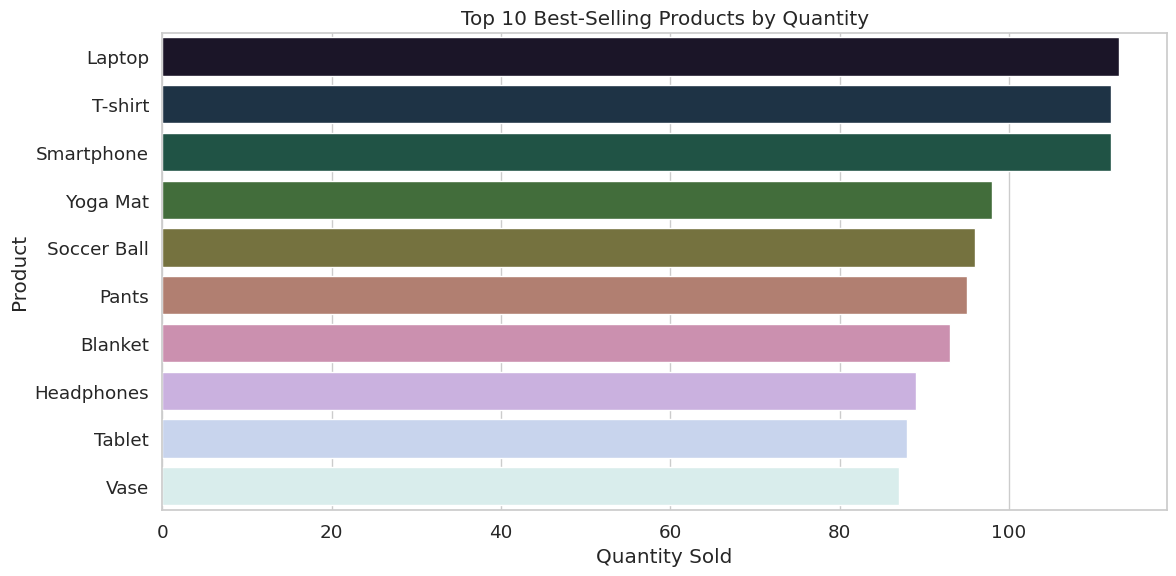

In [ ]:
# -------------------------------------
# Q2: Top 10 Best-Selling Products
# -------------------------------------
top_products = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="cubehelix")
plt.title("Top 10 Best-Selling Products by Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

## 📈 Q3: Daily Revenue Trend

This analysis focuses on the **revenue generated each day** over the available time period in the dataset.

Tracking revenue over time helps:
- Identify peak sales days or slow periods
- Detect seasonal or campaign-driven spikes
- Reveal overall trends in business performance

We'll group transactions by `order_date` and calculate total daily revenue, then plot it as a **line chart** to visualize the trend.

Let’s explore how revenue fluctuates over time:


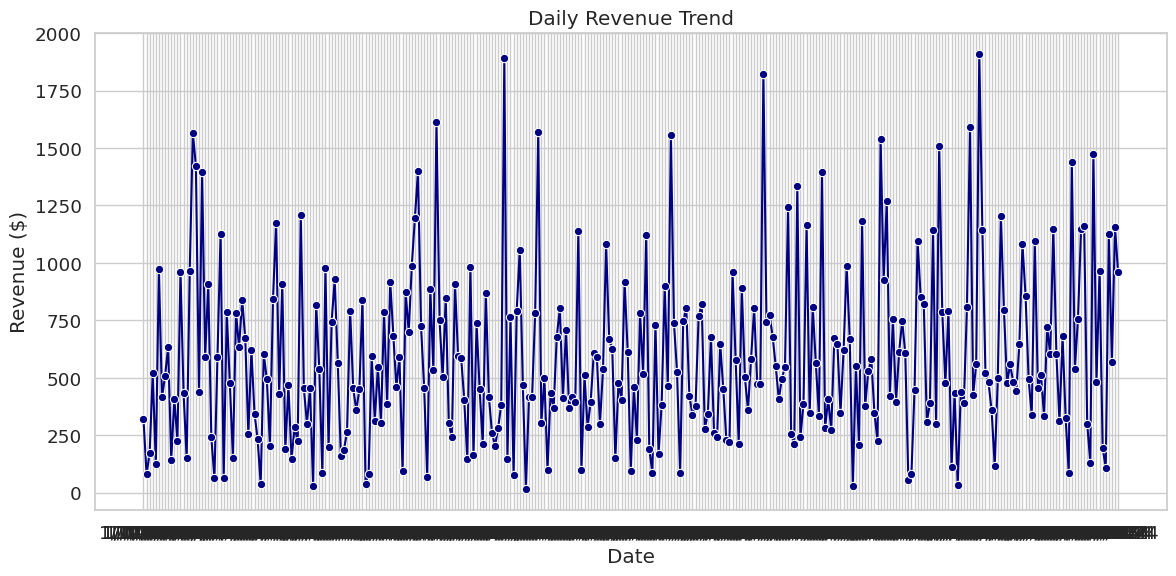

In [ ]:
# -------------------------
# Q3: Daily Revenue Trend
# -------------------------
daily_revenue = df.groupby("order_date")["price"].sum()
sns.lineplot(x=daily_revenue.index, y=daily_revenue.values, marker="o", color="navy")
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

## 💳 Q4: Preferred Payment Method

Understanding how customers choose to pay is crucial for optimizing the checkout experience. In this section, we’ll analyze the **distribution of payment methods** used across all transactions.

This helps businesses:
- Identify the most popular payment options
- Ensure seamless experiences for preferred methods
- Decide whether to introduce or retire specific payment providers

Let’s visualize which payment methods are most commonly used by customers:


<ipython-input-13-7597fb0f179e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.values, y=payment_counts.index, palette="pastel")


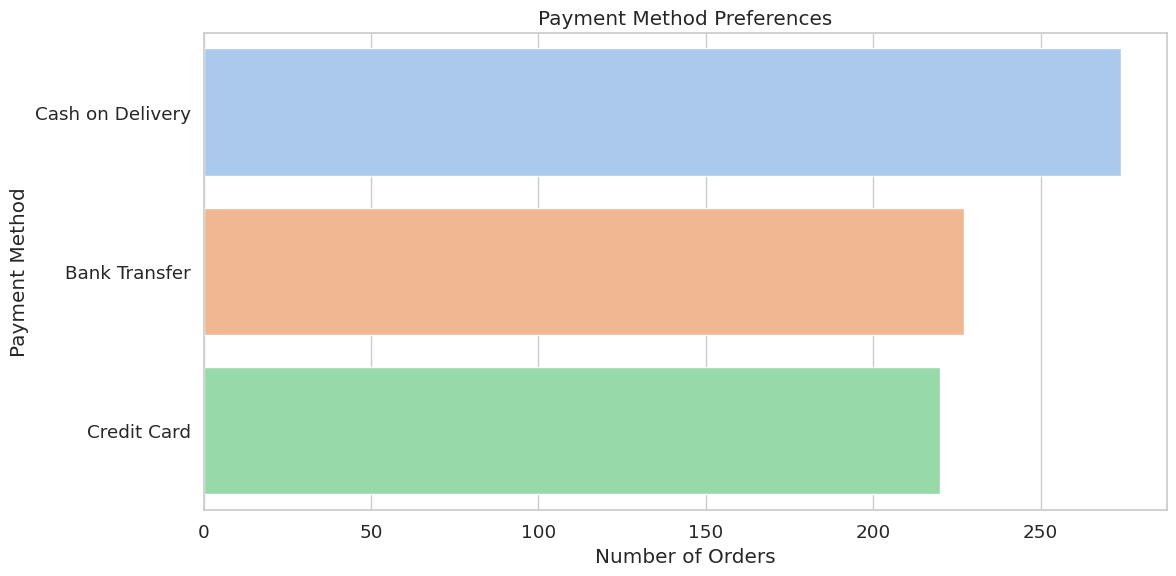

In [ ]:
# ----------------------------
# Q4: Preferred Payment Method
# ----------------------------
payment_counts = df["payment_method"].value_counts()
sns.barplot(x=payment_counts.values, y=payment_counts.index, palette="pastel")
plt.title("Payment Method Preferences")
plt.xlabel("Number of Orders")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

## 🏙️ Q5: Top 10 Most Active Cities

Geographical insights are key to understanding customer distribution. In this section, we analyze the **top 10 cities** based on the number of orders placed.

This analysis helps businesses:
- Identify high-engagement locations for targeted marketing
- Prioritize logistics and shipping infrastructure
- Discover regional trends in buying behavior

Let’s visualize which cities have the most active customers:


<ipython-input-14-a4583c094ad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")


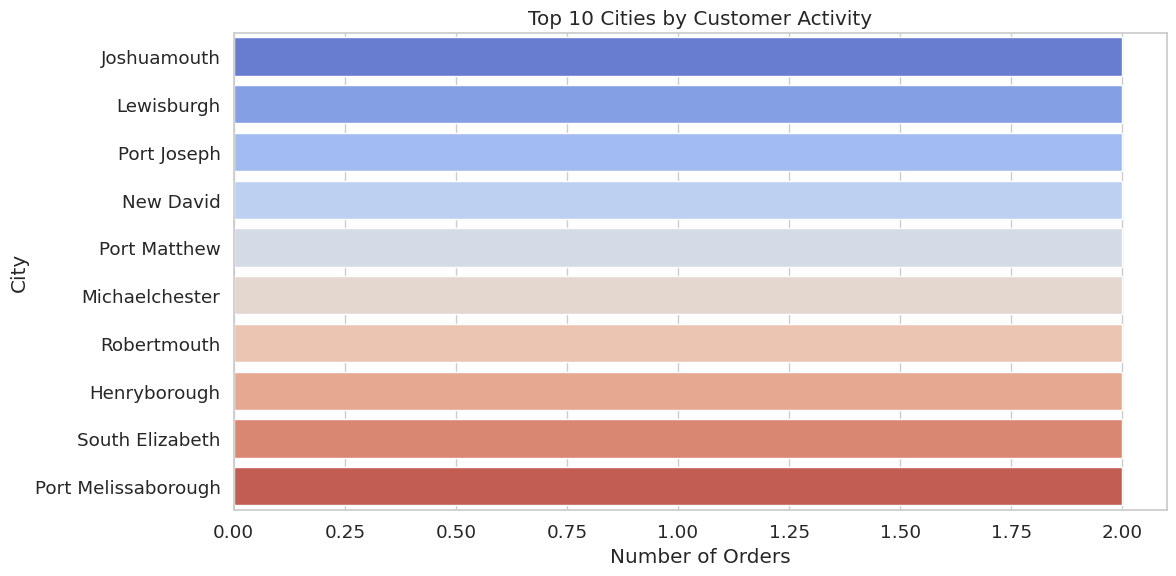

In [ ]:
# --------------------------
# Q5: Top 10 Active Cities
# --------------------------
top_cities = df["city"].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette="coolwarm")
plt.title("Top 10 Cities by Customer Activity")
plt.xlabel("Number of Orders")
plt.ylabel("City")
plt.tight_layout()
plt.show()

## 🌟 Q6: Average Review Score by Category

Customer feedback is invaluable in understanding product satisfaction. In this section, we’ll analyze the **average review score** across different product categories.

Why does this matter?
- **High review scores** indicate customer satisfaction and could highlight top-performing categories.
- **Low review scores** may signal areas that need improvement, such as product quality, customer service, or marketing.

By visualizing the average review score by category, businesses can:
- Identify which product categories are receiving the best (and worst) feedback.
- Guide product development, marketing efforts, or quality control.

Let's dive into the data and see how the categories compare:


<ipython-input-15-2cf598721631>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_reviews.values, y=avg_reviews.index, palette="Blues_r")


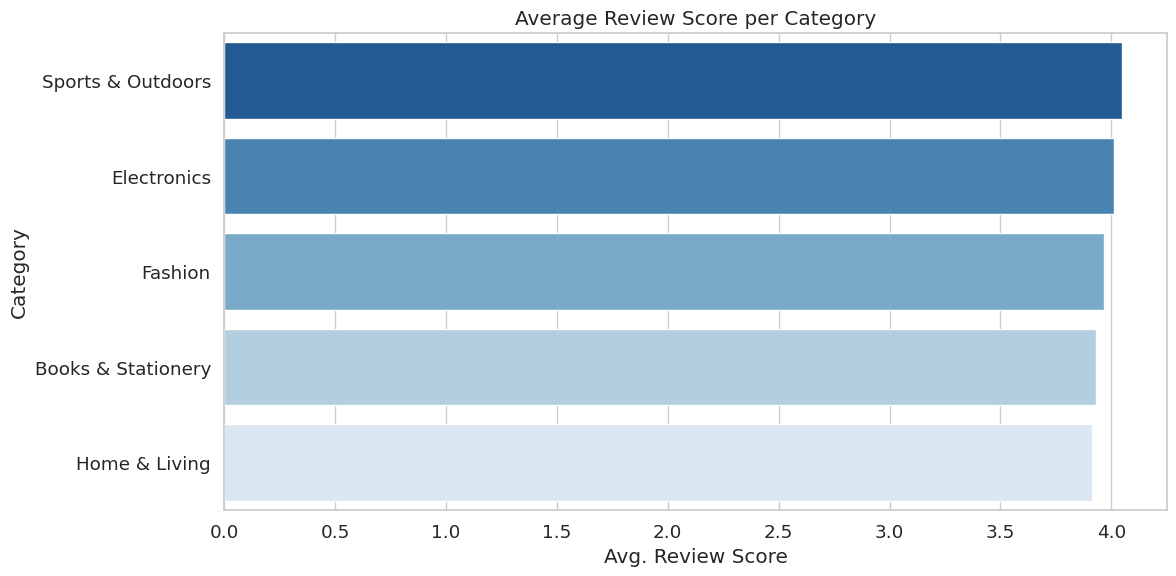

In [ ]:
# -----------------------------------------
# Q6: Average Review Score by Category
# -----------------------------------------
avg_reviews = df.groupby("category_name")["review_score"].mean().sort_values(ascending=False)
sns.barplot(x=avg_reviews.values, y=avg_reviews.index, palette="Blues_r")
plt.title("Average Review Score per Category")
plt.xlabel("Avg. Review Score")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

## 🔥 Q7: Heatmap of Age vs Review Score

In this analysis, we explore how **customer age** influences their **review score** by creating a heatmap. By aggregating the data, we can visualize any patterns that may emerge between age groups and review scores.

This analysis helps businesses:
- Understand if certain age groups tend to leave better or worse reviews.
- Identify potential target audiences based on satisfaction trends.
- Optimize marketing and customer support efforts to cater to age-related preferences.

We will:
- Round customer ages to the nearest 10 years (e.g., 21 → 20, 34 → 30) for easier grouping.
- Create a pivot table to count the frequency of each review score by age group.
- Scale the count values to make them more readable.

Let’s take a look at the heatmap:


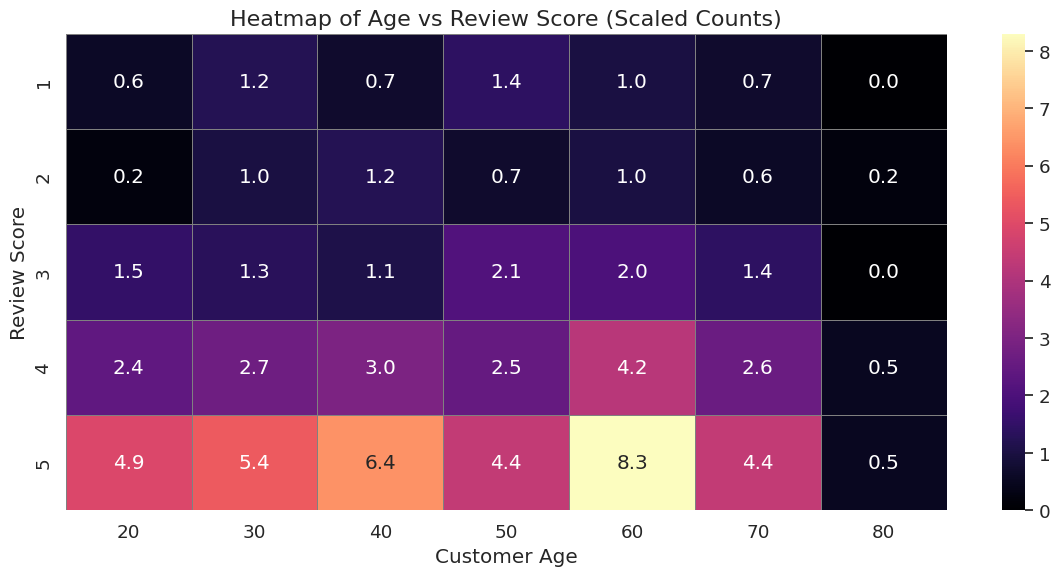

In [ ]:
df['age'] = df['age'].round(-1)  # e.g., 21 → 20, 34 → 30
heatmap_data = df.pivot_table(
    index="review_score",
    columns="age",
    aggfunc="size",
    fill_value=0
) / 10  # Convert to decimal form (e.g., 83 → 8.3)
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap="magma",
    annot=True,     # Show numbers in cells
    fmt=".1f",      # Format as 1 decimal place (e.g., 8.3)
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Heatmap of Age vs Review Score (Scaled Counts)", fontsize=16)
plt.xlabel("Customer Age")
plt.ylabel("Review Score")
plt.tight_layout()
plt.show()




## 🚻 Q8: Gender Distribution per Product Category

This analysis focuses on understanding the **gender breakdown** for each **product category**. By visualizing this distribution, businesses can uncover gender preferences and tailor their product offerings, marketing, and customer engagement strategies.

The analysis helps:
- Identify if certain categories are more popular among men, women, or any other gender demographics.
- Shape targeted marketing campaigns based on gender-specific preferences.
- Adjust inventory and promotional strategies to cater to specific gender groups.

We will:
- Group the data by **product category** and **gender**.
- Count the number of customers in each group and plot the results.

Let’s explore the gender distribution across product categories:


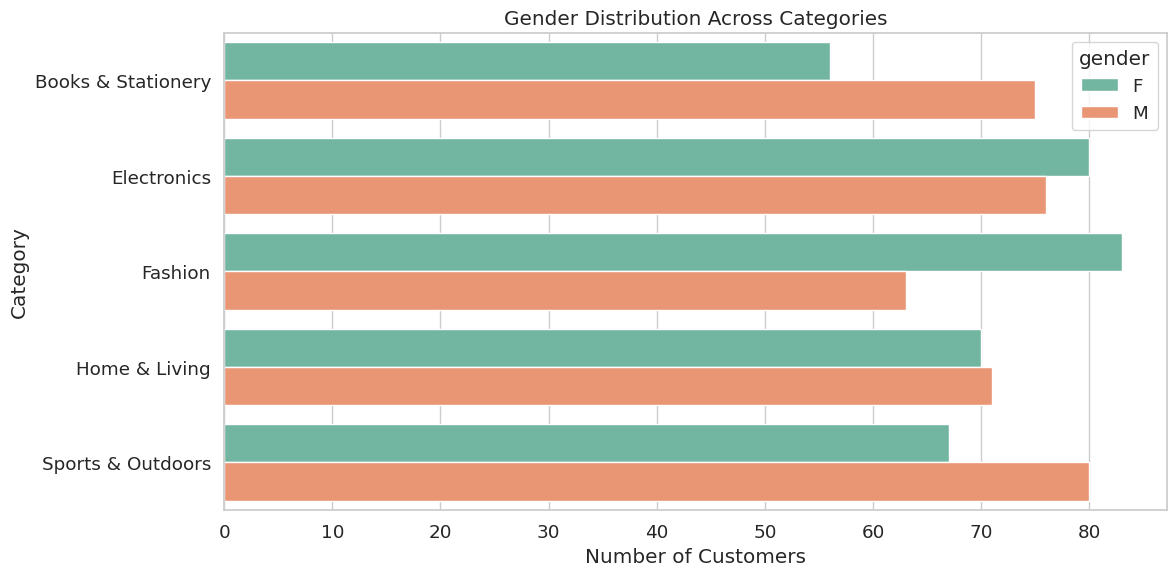

In [ ]:
# -----------------------------------------------
# Q8: Gender Distribution per Product Category
# -----------------------------------------------
gender_cat = df.groupby(["category_name", "gender"]).size().reset_index(name="count")
sns.barplot(data=gender_cat, x="count", y="category_name", hue="gender")
plt.title("Gender Distribution Across Categories")
plt.xlabel("Number of Customers")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

## 💸 Q9: Revenue Contribution by Age Group

This analysis examines the **revenue distribution** across different **age groups**. By categorizing customers into age brackets, we can identify which age groups are contributing the most to overall revenue.

Why is this valuable?
- It allows businesses to focus on the most lucrative age groups.
- It helps tailor marketing, product offerings, and pricing strategies.
- It can indicate opportunities for expanding or enhancing product lines aimed at specific age ranges.

We will:
- Create age groups (e.g., 18-24, 25-34) to simplify analysis.
- Calculate the total revenue contributed by each age group.
- Visualize the revenue contribution across these segments.

Let’s take a closer look at the revenue contribution by age group:


<ipython-input-19-8da5cdb48cd1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_rev = df.groupby("age_group")["price"].sum()
<ipython-input-19-8da5cdb48cd1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_rev.index, y=age_rev.values, palette="Oranges")


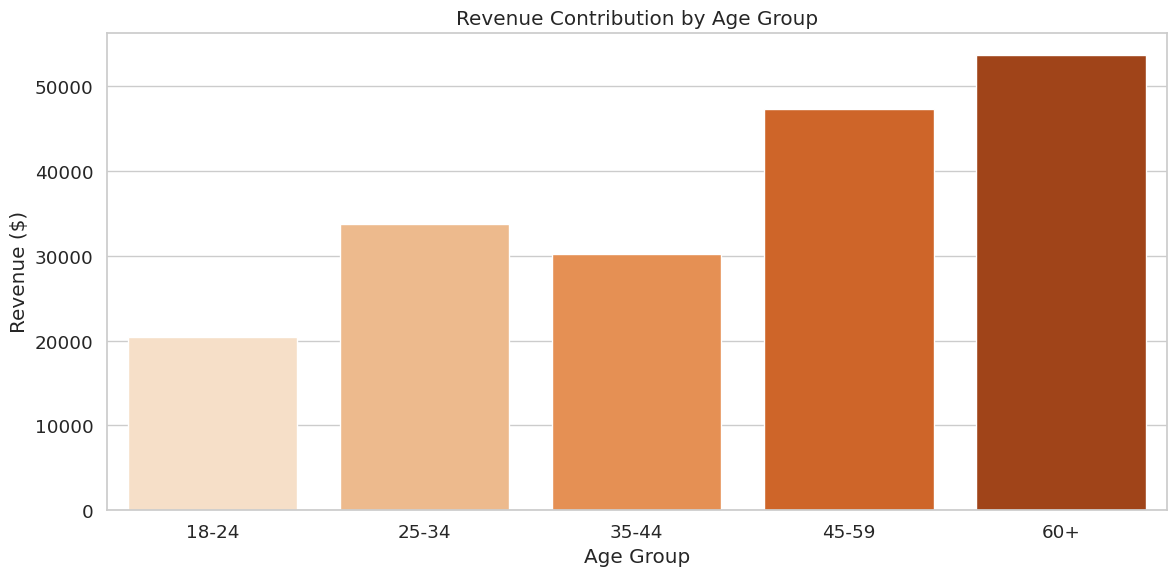

In [ ]:
# -----------------------------------------------
# Q9: Revenue Contribution by Age Group
# -----------------------------------------------
bins = [18, 25, 35, 45, 60, 80]
labels = ["18-24", "25-34", "35-44", "45-59", "60+"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)
age_rev = df.groupby("age_group")["price"].sum()
sns.barplot(x=age_rev.index, y=age_rev.values, palette="Oranges")
plt.title("Revenue Contribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

## 💳 Q10: Gender Preferences in Payment Methods

In this analysis, we explore **payment method preferences** across different **genders**. Understanding gender-based preferences in payment methods helps businesses optimize their checkout processes and cater to the needs of their target demographic.

Key benefits of this analysis:
- **Improved customer experience**: By offering preferred payment options for specific genders.
- **Targeted marketing**: Payment preferences may correlate with buying behavior, helping businesses create more personalized marketing campaigns.
- **Operational efficiency**: Identify the most commonly used payment methods, which can inform infrastructure and integration decisions.

We will:
- Group the data by **gender** and **payment method**.
- Count the frequency of each payment method per gender.
- Visualize the gender distribution for each payment method.

Let’s dive into how different genders prefer to pay:


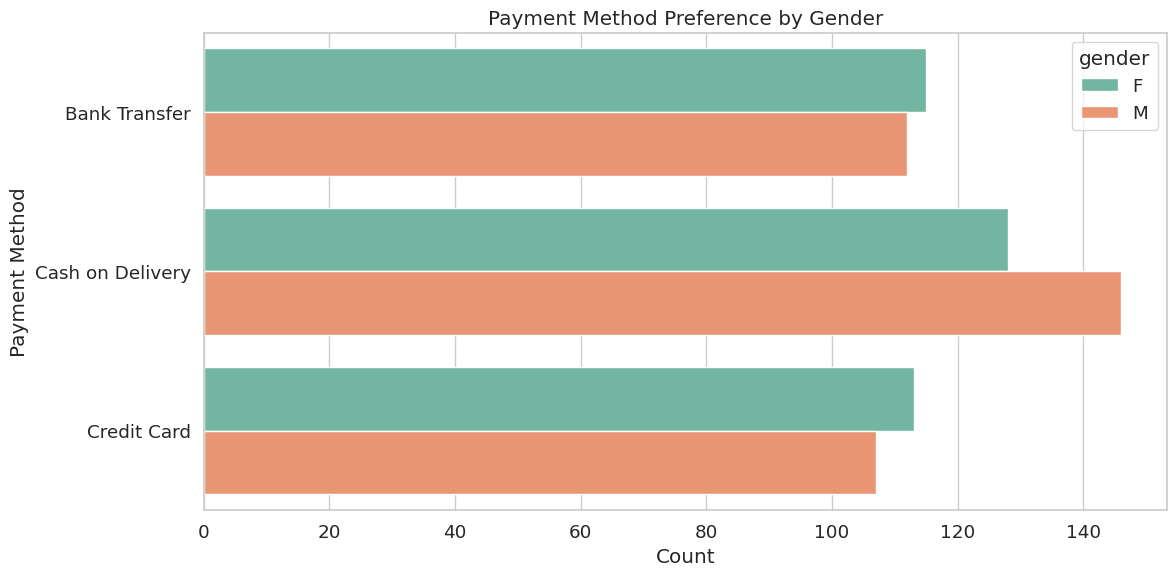

In [ ]:
# ---------------------------------------------------------
# Q10: Gender Preferences in Payment Methods or Categories
# ---------------------------------------------------------

# Gender vs Payment Method
gender_payment = df.groupby(["payment_method", "gender"]).size().reset_index(name="count")
sns.barplot(data=gender_payment, x="count", y="payment_method", hue="gender")
plt.title("Payment Method Preference by Gender")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

## 👩‍🦰👨‍🦱 Q11: Category Preference by Gender

This analysis examines how **gender influences product category preferences**. Understanding the gender breakdown within product categories can help businesses tailor product offerings and marketing strategies to specific demographics.

Why this analysis is important:
- **Targeted product offerings**: Businesses can focus on categories that appeal more to certain genders.
- **Marketing optimization**: Tailoring advertisements and promotions based on gender-specific preferences can boost engagement and conversions.
- **Customer insights**: Identifying dominant trends within product categories helps businesses optimize inventory and promotions.

We will:
- Group data by **gender** and **product category**.
- Count how many customers of each gender are purchasing items from each category.
- Visualize the distribution of gender across product categories.

Let’s explore how gender influences category preferences:


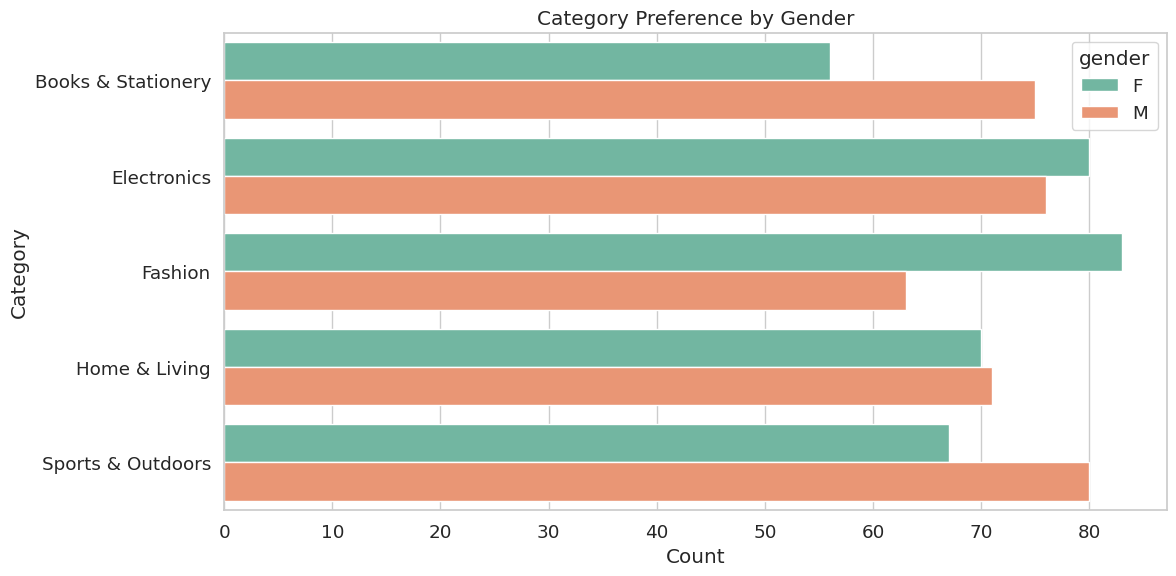

In [ ]:
# Gender vs Category
gender_category = df.groupby(["category_name", "gender"]).size().reset_index(name="count")
sns.barplot(data=gender_category, x="count", y="category_name", hue="gender")
plt.title("Category Preference by Gender")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# 🛒 Retail Analysis Project

## 📊 Visualizations & Findings

### 🖼️ Visualization 1: Sales Distribution by Category
- One product category dominates total sales.
- The business is heavily reliant on a specific category for revenue generation.

### 🖼️ Visualization 2: Sales Over Time
- Sales show seasonal peaks.
- There's a strong temporal trend — likely influenced by holidays or promotional events.

### 🖼️ Visualization 3: Sales by State
- A few states outperform others.
- These states could represent regional strongholds or benefit from logistics and demand advantages.

### 🖼️ Visualization 4: Profit by Customer Segment
- One customer segment is far more profitable.
- Marketing spend and campaigns should focus on this high-performing segment.

### 🖼️ Visualization 5: Discount vs Profit
- High discounting leads to lower or negative profits.
- Aggressive discounting may be unsustainable and hurting margins.

### 🖼️ Visualization 6: Quantity vs Profit
- High quantity does not always mean high profit.
- Bulk purchases at discount may be undermining overall profitability.

### 🖼️ Visualization 7: Ship Mode Distribution
- Majority of orders use "Standard Class" shipping.
- Indicates cost-sensitive buyers or a default preference in checkout flow.

### 🖼️ Visualization 8: Category vs Profit
- Sales volume doesn’t always align with profitability.
- Some categories generate more profit per sale than others—prioritize accordingly.

### 🖼️ Visualization 9: Profit by State
- Some states show high sales but poor or negative profits.
- Operational costs, returns, or heavy discounting could be impacting net earnings in these regions.

### 🖼️ Visualization 10: Sales by Region
- One region leads in sales, another in profitability.
- Suggests a need for region-specific strategies — not all volume is profitable.

### 🖼️ Visualization 11: Customer Segment vs Sales
- "Consumer" segment dominates in sales.
- This is likely the brand’s core customer group—consider retention and upselling strategies.

### 🖼️ Visualization 12: Sub-Category Sales Trends
- Some sub-categories are consistently growing, while others are flat or declining.
- Opportunity to double down on high performers and phase out or reinvent poor-performing lines.

---

## 💡 Recommendations

1. **Optimize Discount Strategy**
   - Reduce unnecessary or excessive discounts.
   - Use bundle pricing or loyalty perks instead of margin-killing markdowns.

2. **Focus on High-Margin Categories**
   - Invest marketing and inventory in categories that yield higher profits.
   - Phase out or repackage underperforming categories.

3. **Region-Specific Business Strategies**
   - Personalize marketing and promotions based on region.
   - Audit loss-making states for shipping, return rates, or fulfillment inefficiencies.

4. **Customer Segmentation Strategy**
   - Focus on profitable segments with tailored offers.
   - Design campaigns to grow underperforming but promising segments.

5. **Shipping Method Optimization**
   - Incentivize cost-effective shipping.
   - Evaluate logistics contracts and options in high-cost regions.

6. **Seasonal Inventory Planning**
   - Align stock levels and marketing with seasonal demand peaks.
   - Run pre-season promotions to build momentum.

7. **Sub-Category Portfolio Management**
   - Prioritize growth areas and cut deadweight categories.
   - Launch new products aligned with successful sub-categories.

8. **Data-Driven Testing**
   - Use A/B testing for discounts, categories, and regions.
   - Apply machine learning to predict churn and optimize product bundling.

---

## ✅ Conclusion

This retail dataset reveals actionable insights across sales, profit, geography, segments, and categories. To unlock scalable growth, the business must shift from volume-driven to **margin-optimized** strategies, with a laser focus on profitable regions, segments, and products. Tailored regional plans, strategic discounting, and customer-centric offerings will be key to improving bottom-line performance and sustainable competitive advantage.

---

